# Demo Usage on 2D toy data

The notebook demonstrate a common usage example of clustering 2D toy datasets with FINCH. For the purpose we cluster two well known 2D datasets that are commonly used to study clustering problems - Gestalt [1] and Aggregation data [2].

[1] Charles T Zahn. Graph theoretical methods for detecting and describing gestalt clusters. IEEE TOC, 1970.

[2] Aristides Gionis, Heikki Mannila, and Panayiotis Tsaparas. Clustering aggregation. ACM TKDD, 2007.



In [162]:
import numpy as np
from finch import FINCH

# 1. Load Gestalt 2D data for clustering

We load the 2D Gestalt dataset which has 399 samples belonging to 6 classes. The data is included in the github repo in the data folder.

In [188]:
data_path = "../data/toy_data/gestalt_clusters.txt"
data = np.genfromtxt(data_path)
gt = data[:, 2]
data = data[:, :2]

In [189]:
data.shape

(399, 2)

In [190]:
# ground truth clusters
len(np.unique(gt))

6

# Cluster with FINCH

Since here the the toy data has 2d coordinates specifying the position of points, we cluster it using euclidean distance. Note that the default distance is cosine which is recommended for real-world data.

In [191]:
c, num_clust, req_c = FINCH(data, distance='euclidean')

Partition 0: 92 clusters
Partition 1: 29 clusters
Partition 2: 14 clusters
Partition 3: 12 clusters


### Required number of clusters

In many application we need to cluster a dataset to obtain a specifioed number of clusters. This can be done easily with FINCH by setting the input param req_clust. For example lets cluster the dataset to obtain the required 6 cluster partition.

Here the variable req_c will contain the labels of the 6 clusters.

In [192]:
c, num_clust, req_c = FINCH(data, req_clust=len(np.unique(gt)), distance='euclidean', verbose=False)

In [193]:
print(req_c.shape)
print(np.unique(req_c))

(399,)
[0 1 2 3 4 5]


# 2. Load and cluster Aggregation 2D dataset

Similarly we load and cluster the 2D Aggregate dataset which has 799 samples belonging to 7 classes. The data is included in the github repo in the data folder.

In [209]:
data_path = "../data/toy_data/Aggregation.txt"
data_a = np.genfromtxt(data_path)
gt_a = data_a[:, 2]
data_a = data_a[:, :2]

In [210]:
c_a, num_clust_a, req_c_a = FINCH(data_a, req_clust=len(np.unique(gt_a)), distance='euclidean', verbose=False)

# Evaluate quality of clustering 

In [217]:
from sklearn.metrics import normalized_mutual_info_score as nmi
score_a = nmi(gt_a, req_c_a)
score_g = nmi(gt, req_c)
print('NMI Score Gestalt data: {:.2f}'.format(score_g * 100))
print('NMI Score Aggregation data: {:.2f}'.format(score_a * 100))

NMI Score Gestalt data: 84.70
NMI Score Aggregation data: 98.23


## Visualize the returned clustering labels

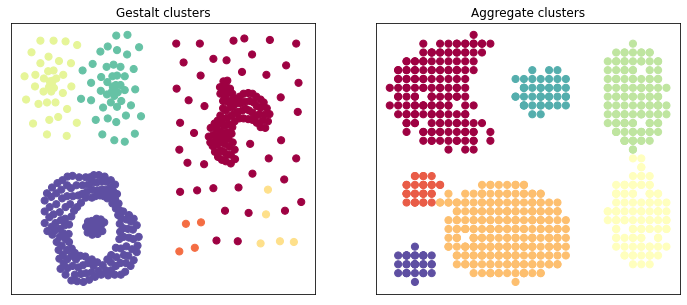

In [215]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].set_title('Gestalt clusters')
ax[0].scatter(*data.T, s=50, c=req_c, cmap='Spectral')
ax[1].set_title('Aggregate clusters')
ax[1].scatter(*data_a.T, s=50, c=req_c_a, cmap='Spectral')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()